# Побудова регресійної моделі

#### Імпорт необхідних бібліотек

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy
import sklearn
import math

##### Зчитування csv файлу 
Джерело даних - https://www.kaggle.com/datasets/shubham47/students-score-dataset-linear-regression

In [35]:
df = pd.read_csv('./student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [36]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Побудова регресійної моделі засобами бібліотеки seaborn

<Axes: xlabel='Hours', ylabel='Scores'>

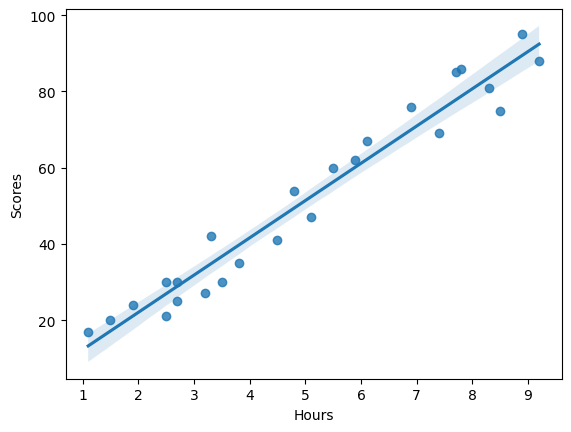

In [37]:
sns.regplot(data=df, x='Hours', y="Scores")

#### Побудова регресійної моделі власноруч

In [38]:
X = df.iloc[:,0].values
Y = df.iloc[:,1].values

In [39]:
_X = np.column_stack((np.repeat(1, len(X)), X))
a0, a1 = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(_X), _X)), np.transpose(_X)), Y)
y = lambda x: a0+a1*x
Y_pred = np.array(list(map(y, X)))

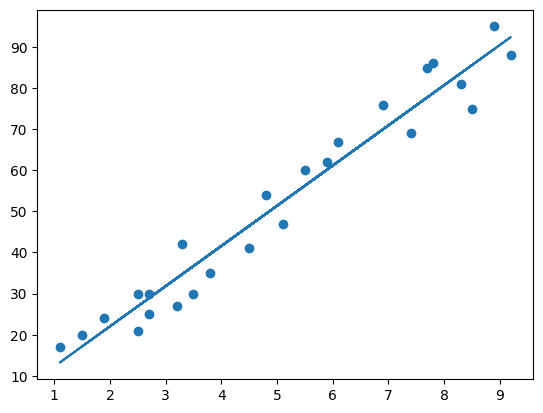

In [40]:
plt.scatter(X, Y)
plt.plot(X, Y_pred)

#### Характеристики регресійної моделі


Коефіцієнт кореляції

In [41]:
R = scipy.stats.pearsonr(X, Y)[0]
R

0.9761906560220884

Коефіцієнт детермінації

In [42]:
R_square = sklearn.metrics.r2_score(Y, Y_pred) 
R_square

0.9529481969048356

In [43]:
n, m, k1 = len(X), 1, 1
k2 = n - m - 1
alpha = .05

Фактичний F-критерій

In [44]:
F_R = (R_square/(1-R_square))*((n-m-1)/m)
F_R

465.8229246705263

Табличний F-критерій (Фішера-Снедекора)

In [45]:
F_alpha_k1_k2 = scipy.stats.f.ppf(q=1-alpha, dfn=k1, dfd=k2)
F_alpha_k1_k2

4.279344309144648

Статистична значущість коефіцієнта детермінації


In [73]:
if(F_R > F_alpha_k1_k2):
    print("Коефіцієнт детермінації статистично значимий")
else:
    print("Коефіцієнт детермінації НЕ статистично значимий")

Коефіцієнт детермінації статистично значимий


Істотність зв'язку між залежною і незалежними змінними регресійної моделі

In [72]:
sigma_u2 = sum((Y- Y_pred)**2)/k2
sigma_y2 = sum(list(map(lambda y: (y-np.average(Y))**2, Y)))/(n - 1)
F = (sigma_y2 - sigma_u2)/sigma_u2

In [49]:
if(F > F_alpha_k1_k2):
    print("ГІПОТЕЗА про істотність зв'язку між залежною і незалежними змінними регресійної моделі ПІДТВЕРДЖУЄТЬСЯ")
else:
    print("ГІПОТЕЗА про істотність зв'язку між залежною і незалежними змінними регресійної моделі НЕ ПІДТВЕРДЖУЄТЬСЯ")

ГІПОТЕЗА про істотність зв'язку між залежною і незалежними змінними регресійної моделі ПІДТВЕРДЖУЄТЬСЯ


Перевірка статистичної значущості параметра a1

In [50]:
sigma_a1 = math.sqrt(sigma_u2*np.linalg.inv(np.dot(np.transpose(_X), _X))[1][1])

In [51]:
t1 = abs(a1)/sigma_a1
t_table = scipy.stats.t.ppf(1-alpha/2,df=k2)

In [52]:
if(t1 > t_table):
    print("Параметр a1 є статистично значимий")
else:
    print("Параметр a1 НЕ є статистично значимий")

Параметр a1 є статистично значимий


Довірчий інтервал параметра a1

In [53]:
print(a1-t_table*sigma_a1, '< a1 <', a1+t_table*sigma_a1)

8.838822691742388 < a1 < 10.712784089832555


Довірчі інтервали для y0 при точковому значенні показника x0=9.75

In [62]:
x0 = 9.75
y0 = y(x0)


In [60]:
temp = np.dot(np.dot(np.array([1, x0]), np.linalg.inv(np.dot(np.transpose(_X), _X))), np.array([1, x0]).reshape(2,1)).item()
sigma_n2 = sigma_u2*temp


In [71]:
M_y0_min = y0 - t_table*math.sqrt(sigma_n2)
M_y0_max = y0 + t_table*math.sqrt(sigma_n2)

print(str('З імовірністю P=')+str(1-alpha)+str(' прогноз математичного сподівання M(y0) потрапляє в інтервал [')+
      str(M_y0_min)+str(',')+str(M_y0_max)+str(']'))

y0_min = y0 - t_table*math.sqrt(sigma_u2*(1+temp))
y0_max = y0 + t_table*math.sqrt(sigma_u2*(1+temp))

print(str('З імовірністю P=')+str(1-alpha)+str(' прогноз індивідуального значення y0 потрапляє в інтервал [')+
      str(y0_min)+str(',')+str(y0_max)+str(']'))

З імовірністю P=0.95 прогноз математичного сподівання M(y0) потрапляє в інтервал [92.78953546561569,102.80597746548641]
З імовірністю P=0.95 прогноз індивідуального значення y0 потрапляє в інтервал [85.17122970402568,110.42428322707642]
